In [23]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression


In [24]:
# Loading the Dataset
drybean = pd.read_csv("Dry_Bean_Dataset.csv")
drybean


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [4]:
# Dimensions of the beans data
print(f"The dry beans data has {drybean.shape[1]} columns.")
print(f"The dry beans data has {drybean.shape[0]} rows.")

The dry beans data has 17 columns.
The dry beans data has 13611 rows.


In [5]:
# Viewing the data feature list, evidence of missing values and data types
print(f"The dry beans data has the following columns: ")
drybean.info()

The dry beans data has the following columns: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class      

In [6]:
#Calculating the count of each type of bean. There are seven classes of bean in this stud
count = drybean['Class'].value_counts()
print(count)

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64


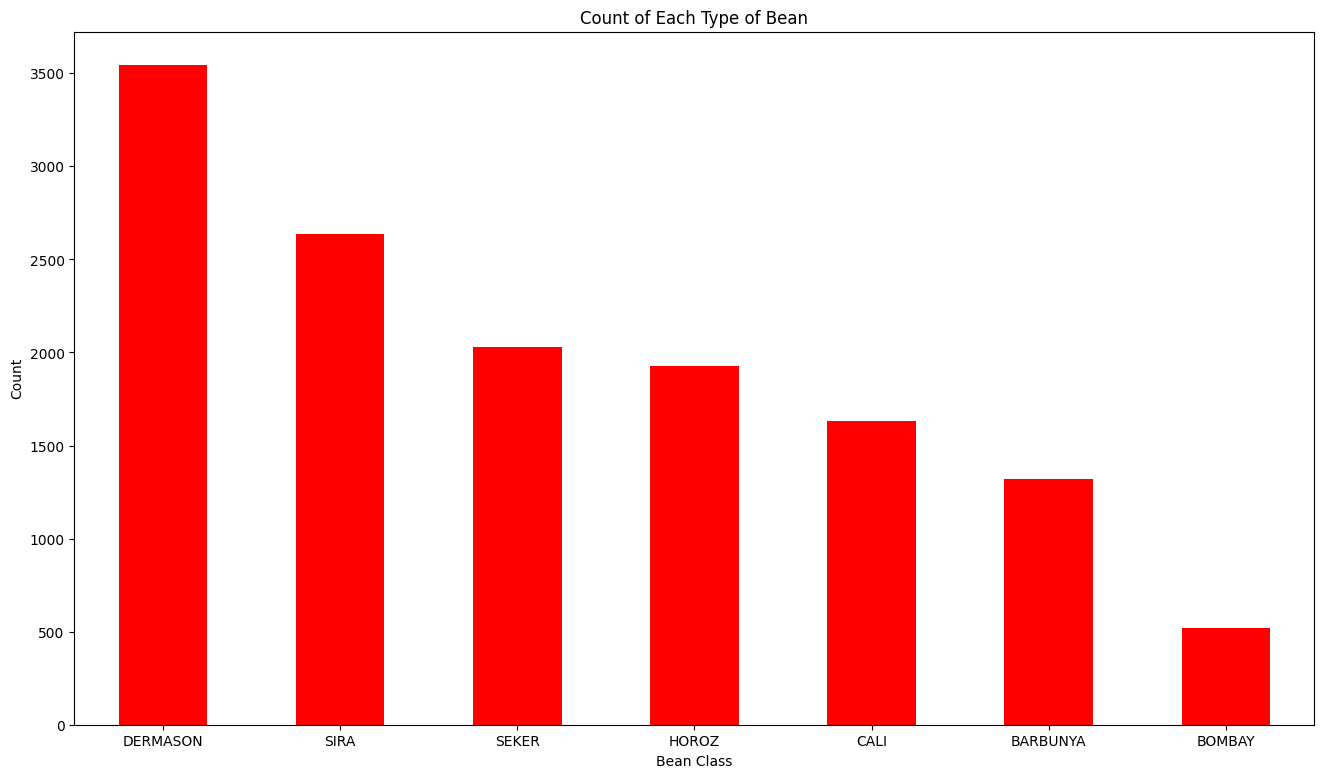

In [7]:
plt.figure()
count.plot(kind='bar', color='red', figsize=(16,9))
plt.title('Count of Each Type of Bean')
plt.title('Count of Each Type of Bean')
plt.xlabel('Bean Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(False)

In [8]:
# Oversampling the Data using smote (Synthetic Minority Over-Sampling Technique)
from imblearn.over_sampling import SMOTE

X = drybean.drop('Class', axis=1)
y= drybean['Class']
print("Before Oversampling, counts of 'DERMASON': {}". format(sum(y=='DERMASON')))
print("Before Oversampling, counts of 'SIRA': {}".format(sum(y == 'SIRA')))
print("Before Oversampling, counts of 'SEKER': {}".format(sum(y == 'SEKER')))
print("Before Oversampling, counts of 'HOROZ': {}".format(sum(y == 'HOROZ')))
print("Before Oversampling, counts of 'CALI': {}".format(sum(y == 'CALI')))
print("Before Oversampling, counts of 'BARBUNYA': {}".format(sum(y == 'BARBUNYA')))
print("Before Oversampling, counts of 'BOMBAY': {}\n".format(sum(y == 'BOMBAY')))

sm = SMOTE(random_state=1)
X_res, y_res = sm.fit_resample(X, y.ravel()) #y.ravel() func changes the shape of 'y' so it's a single list of values. This makes sure it works correctly with SMOTE.
#fit_resample increases the minority dataset

# Data after oversampling
print('After Oversampling, the shape of train_X: {}'.format(X_res.shape))
print('After Oversampling, the shape of train_y: {} \n'.format(y_res.shape))

print("After Oversampling, counts of 'DERMASON': {}".format(sum(y_res == 'DERMASON')))
print("After Oversampling, counts of 'SIRA': {}".format(sum(y_res == 'SIRA')))
print("After Oversampling, counts of 'SEKER': {}".format(sum(y_res == 'SEKER')))
print("After Oversampling, counts of 'HOROZ': {}".format(sum(y_res == 'HOROZ')))
print("After Oversampling, counts of 'CALI': {}".format(sum(y_res == 'CALI')))
print("After Oversampling, counts of 'BARBUNYA': {}".format(sum(y_res == 'BARBUNYA')))
print("After Oversampling, counts of 'BOMBAY': {}\n".format(sum(y_res == 'BOMBAY')))



Before Oversampling, counts of 'DERMASON': 3546
Before Oversampling, counts of 'SIRA': 2636
Before Oversampling, counts of 'SEKER': 2027
Before Oversampling, counts of 'HOROZ': 1928
Before Oversampling, counts of 'CALI': 1630
Before Oversampling, counts of 'BARBUNYA': 1322
Before Oversampling, counts of 'BOMBAY': 522

After Oversampling, the shape of train_X: (24822, 16)
After Oversampling, the shape of train_y: (24822,) 

After Oversampling, counts of 'DERMASON': 3546
After Oversampling, counts of 'SIRA': 3546
After Oversampling, counts of 'SEKER': 3546
After Oversampling, counts of 'HOROZ': 3546
After Oversampling, counts of 'CALI': 3546
After Oversampling, counts of 'BARBUNYA': 3546
After Oversampling, counts of 'BOMBAY': 3546



/tmp/ipykernel_12743/864484942.py:15: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  X_res, y_res = sm.fit_resample(X, y.ravel()) #y.ravel() func changes the shape of 'y' so it's a single list of values. This makes sure it works correctly with SMOTE.


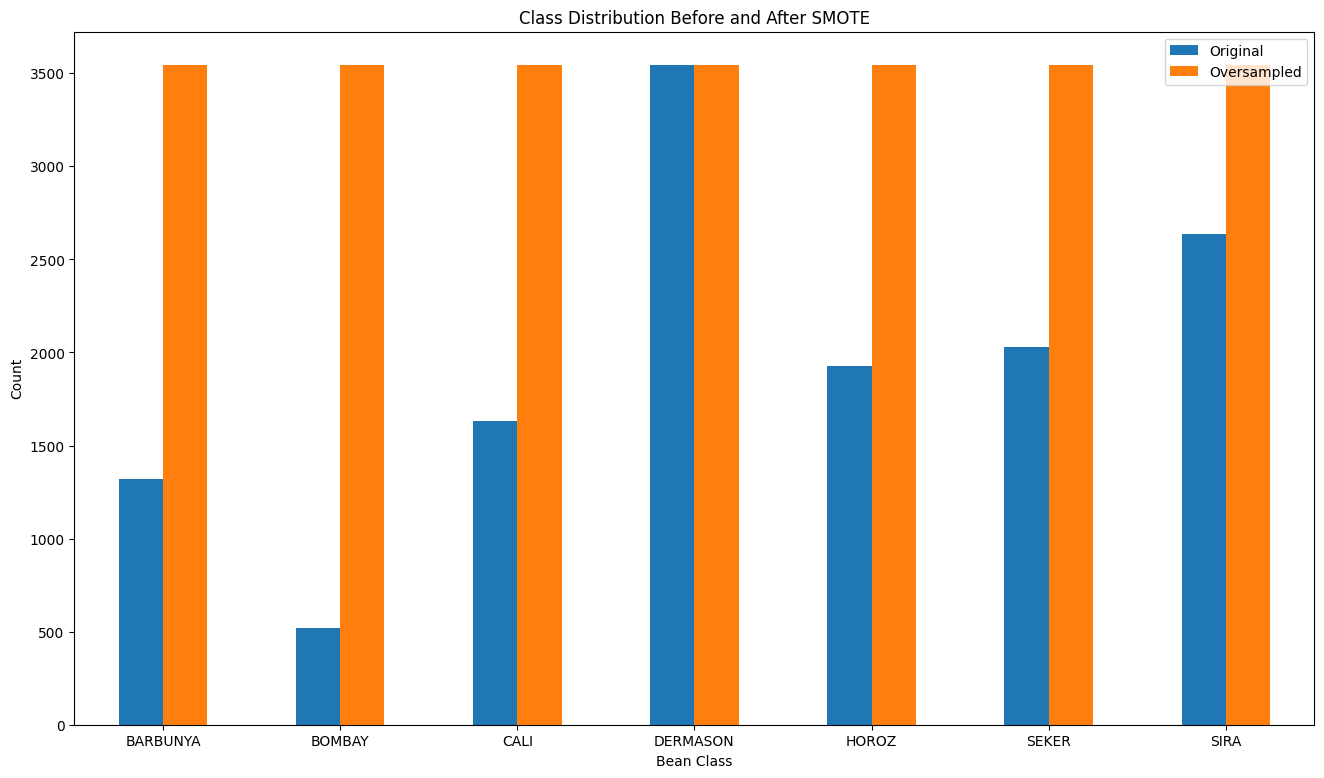

In [9]:
# Making a Bar Graph For Visualization Of features

# Original Data of Class before oversampling
original_counts = y.value_counts()

#Oversampled Class Data
oversampled_counts = pd.Series(y_res).value_counts()

#Combining both counts into a DataFrame
counts_df = pd.DataFrame({"Original": original_counts, "Oversampled": oversampled_counts})
#counts_df

#Plotting the graph
counts_df.plot(kind='bar', figsize=(16,9))

plt.title('Class Distribution Before and After SMOTE')
plt.xlabel('Bean Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()



In [29]:
#Scaling the values
from sklearn.preprocessing import MinMaxScaler

# Split the dataset into training and testing sets
X = drybean.drop('Class', axis=1)
y = drybean['Class']

# Normalize numerical values into ranges
scaler = MinMaxScaler()

# Select the columns you want to scale
columns_to_scale =  drybean.columns[:-1]

# Fit the scaler on the selected columns
scaler.fit(drybean[columns_to_scale])

# Transform the selected columns using the scaler
drybean[columns_to_scale] = scaler.transform(drybean[columns_to_scale])

In [31]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Splitting the data into traininf and testing sets
X_data = drybean.drop('Class', axis=1)
y = drybean['Class']
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.2, random_state=5)

#Creating an instance of LR for multinomial classification
log_reg = LogisticRegression()
'''What Does lbgfs mean
- lbgfs stands for Limited-memory Broyden Fletcher Goldfarb shanno
- It's an optimization algorithm used to minimize or maximize a function
- It is a quasi-Newton method which means it takes less memory for BFGS
Why use this?
- It is very efficient in terms of memory, making it suitable for large datasets
'''
#Training the model
log_reg.fit(X_train, y_train)

#Predicting the class values for the test data
y_pred = log_reg.predict(X_test)

# Evaluate the accuracy of the LR model
accuracy = accuracy_score(y_test, y_pred)
formatted_accuracy = format(accuracy, ".0%")
print("Accuracy (without cross-validation):", formatted_accuracy)

#Merge training and testing data
X_merged_df = pd.concat([X_train, X_test])
y_merged_df = pd.concat([y_train, y_test])

#Performing cross validation
cv_scores= cross_val_score(log_reg, X_merged_df, y_merged_df, cv=5)
average_accuracy = cv_scores.mean()
formatted_cv_accuracy = format(average_accuracy, ".0%")
print("Cross-validated Accuracy:", formatted_cv_accuracy)



/home/menace/ML-Practise/Data-cleaning/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy (without cross-validation): 92%


/home/menace/ML-Practise/Data-cleaning/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/menace/ML-Practise/Data-cleaning/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Cross-validated Accuracy: 92%


/home/menace/ML-Practise/Data-cleaning/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
# Evaluate the predictions
correct = 0

items = len(X_test)

for i in range(items):
    true_class = y_test.iloc[i]
    predicted_class = y_pred[i]

    try:
        if true_class == predicted_class:
            print(true_class, predicted_class, "XXXXXXXXXX ACCURATE")
            correct += 1
        else:
            print(true_class, predicted_class, "XXXXXXXXXX item#", i+1, "INACCURATE")
    except:
        print("Can't Determine Item #", i+1, "attributes:", ",".join(str(attr) for attr in X_test.iloc[i]))

print("\n",correct/len(y_pred))

SEKER BARBUNYA XXXXXXXXXX item# 1 INACCURATE
SIRA DERMASON XXXXXXXXXX item# 2 INACCURATE
SEKER SEKER XXXXXXXXXX ACCURATE
SIRA SIRA XXXXXXXXXX ACCURATE
DERMASON DERMASON XXXXXXXXXX ACCURATE
SIRA SIRA XXXXXXXXXX ACCURATE
SIRA SIRA XXXXXXXXXX ACCURATE
SIRA SIRA XXXXXXXXXX ACCURATE
BOMBAY BOMBAY XXXXXXXXXX ACCURATE
BOMBAY BOMBAY XXXXXXXXXX ACCURATE
DERMASON DERMASON XXXXXXXXXX ACCURATE
CALI HOROZ XXXXXXXXXX item# 12 INACCURATE
SIRA SIRA XXXXXXXXXX ACCURATE
DERMASON SEKER XXXXXXXXXX item# 14 INACCURATE
HOROZ DERMASON XXXXXXXXXX item# 15 INACCURATE
DERMASON DERMASON XXXXXXXXXX ACCURATE
CALI CALI XXXXXXXXXX ACCURATE
SEKER SEKER XXXXXXXXXX ACCURATE
DERMASON DERMASON XXXXXXXXXX ACCURATE
SEKER SEKER XXXXXXXXXX ACCURATE
BOMBAY BOMBAY XXXXXXXXXX ACCURATE
CALI CALI XXXXXXXXXX ACCURATE
SIRA SIRA XXXXXXXXXX ACCURATE
SIRA SIRA XXXXXXXXXX ACCURATE
HOROZ HOROZ XXXXXXXXXX ACCURATE
BOMBAY BOMBAY XXXXXXXXXX ACCURATE
HOROZ HOROZ XXXXXXXXXX ACCURATE
SEKER SEKER XXXXXXXXXX ACCURATE
BARBUNYA CALI XXXXXXXXXX it